In [3]:
import numpy as np

In [4]:
l = np.array([25., 50., 75.,100.])

In [5]:
Sl = np.array([18., 10., 7., 6.])

In [50]:
log_l = np.log(l)
log_Sl = np.log(Sl)

In [51]:
Dr = 4*(np.sum(np.square(log_l))) - np.square(np.sum(log_Sl))

In [52]:
Nr_k = np.sum(log_Sl)*np.sum(np.square(log_l)) - np.sum(log_l)*np.sum(np.multiply(log_Sl,log_l))

In [53]:
Nr_b = -(4*np.sum(np.multiply(log_l,log_Sl)) - np.sum(log_l)*np.sum(log_Sl)) 

In [54]:
log_k = Nr_k/Dr

In [55]:
b = Nr_b/Dr

In [56]:
np.log(100)

4.6051701859880918

In [57]:
log_k

0.13041277081833968

In [58]:
b

0.019260077615282683

In [46]:
S1 = log_k-b*np.log(100)

In [47]:
S1

0.041716835604623248

In [49]:
np.log(6)

1.791759469228055

In [48]:
np.exp(S1)

1.0425992099730215

In [18]:
np.exp(np.log(10))

10.000000000000002

In [104]:
log_l

array([ 3.21887582,  3.91202301,  4.31748811,  4.60517019])

In [105]:
l

array([  25.,   50.,   75.,  100.])

In [106]:
np.log(l)

array([ 3.21887582,  3.91202301,  4.31748811,  4.60517019])

In [107]:
def func(params, xdata, ydata):
    print params
    return (ydata - np.dot(xdata, params))

In [108]:
import scipy.optimize as optimization

In [111]:
xdata = np.transpose(np.array([[1.0,1.0,1.0,1.],
              log_l]))

In [112]:
xdata

array([[ 1.        ,  3.21887582],
       [ 1.        ,  3.91202301],
       [ 1.        ,  4.31748811],
       [ 1.        ,  4.60517019]])

In [113]:
ydata = log_Sl

In [114]:
ydata

array([ 2.89037176,  2.30258509,  1.94591015,  1.79175947])

In [115]:
x0    = np.array([0.0, 0.0])

In [116]:
print optimization.leastsq(func, x0, args=(xdata, ydata))

[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[  1.49011612e-08   0.00000000e+00]
[  0.00000000e+00   1.49011612e-08]
[ 5.48186441 -0.80959198]
[ 5.48186449 -0.80959198]
[ 5.48186441 -0.80959197]
[ 5.48186442 -0.80959199]
(array([ 5.48186442, -0.80959199]), 3)


In [117]:
np.log(6)

1.791759469228055

In [119]:
np.exp(5.489-0.809*np.log(100))

5.8323343279868967

In [184]:
import numpy as np
import scipy.optimize as optimization
l = np.array([25, 50, 75, 100])
Sl = np.array([18, 10, 7, 6])


log_l = np.log(l)
log_Sl = np.log(Sl)


def func(params, xdata, ydata):
    return (ydata - np.dot(xdata, params))
x0 = np.array([0.0, 0.0])
xdata = np.transpose(np.array([[1.0, 1.0, 1.0, 1.],
                               log_l]))
ydata = log_Sl
log_k, b = optimization.leastsq(func, x0, args=(xdata, ydata))[0]
S = np.exp(log_k + b * np.log(1000)) *10e6

def fwp(wp, wg, D, derivative=False):
    gama = 2600
    F = 1.35
    h = 3.
    a = - 0.36 * S / h
    b =  F * (gama* D) - S * .64
    c =  2 * wg * F * (gama * D)
    d =  (gama * D) * F * wg**2
    if not derivative:
        return (a * wp**3 + b * wp**2 + c * wp + d)
    else:
        return (3 * a * wp**2 + 2 * b * wp + c)

wp1 = 1000
while True:
    wp2 = wp1 - fwp(wp1, 4.5, 200.)/fwp(wp1, 4.5, 200.,True)
    if abs(wp1-wp2) < .00001:
        break
    else:
        wp1 = wp2

print wp1


1.92829232186


In [182]:
S/10e6

0.8952977788164469

In [36]:
import numpy as np
import scipy.optimize as optimization
l = np.array([25, 50, 75, 100])
Sl = np.array([18, 10, 7, 6])


log_l = np.log(l)
log_Sl = np.log(Sl)


def func(params, xdata, ydata):
    return (ydata - np.dot(xdata, params))
x0 = np.array([0.0, 0.0])
xdata = np.transpose(np.array([[1.0, 1.0, 1.0, 1.0],
                               log_l]))
ydata = log_Sl
log_k, b = optimization.leastsq(func, x0, args=(xdata, ydata))[0]
S = np.exp(log_k + b * np.log(1000)) * 1e6


def fwp(wp, wg, D, F, derivative=False):
    roh = 2600
    h = 3.
    g = 9.8
    a = - 0.36 * S / h
    b = F * (roh * g * D) - S * .64
    c = 2 * wg * F * (roh * g * D)
    d = (roh * g * D) * F * wg**2
    if not derivative:
        return (a * wp**3 + b * wp**2 + c * wp + d)
    else:
        return (3 * a * wp**2 + 2 * b * wp + c)

wp1 = 1000
while True:
    wp2 = wp1 - fwp(wp1, 4.5, 1.35, 200.) / fwp(wp1, 4.5, 200., 1.35, True)
    if abs(wp1 - wp2) < .00001:
        break
    else:
        wp1 = wp2

print S / 1e6
print wp1


wp_table = np.matrix([[12., 15., 18., 19.5],
                  [13.5, 16.5, 19.5, 21.],
                  [16.5, 19.5, 22.5, 25.5],
                  [22.5, 25.5, 30., 34.5],
                  [28.5, 34.5, 39., 45.],
                  [39., 42., 45., 48.]])

0.895297778816
67.5209476392


In [4]:
wp_table

matrix([[ 12. ,  15. ,  18. ,  19.5],
        [ 13.5,  16.5,  19.5,  21. ],
        [ 16.5,  19.5,  22.5,  25.5],
        [ 22.5,  25.5,  30. ,  34.5],
        [ 28.5,  34.5,  39. ,  45. ],
        [ 39. ,  42. ,  45. ,  48. ]])

In [5]:
import pandas as pd
I = pd.Index([60., 75., 120., 195., 300., 360.], name="rows")
C = pd.Index([3., 3.6, 4.2, 4.8], name="columns")

In [6]:
df_wp = pd.DataFrame(data=wp_table,index=I,columns=C)

In [7]:
df_F = pd.DataFrame(index=I,columns=C)

In [12]:
h=3
def fos(wg, wp, D):
    return (( S*(wg*.64+(wp/h)*.36)*wp**2 )/(wp**2+ wg**2)/1e6 )
    
for index, rows in df_wp.iterrows():
    D = index
    for i in range(rows.size):
        wg = rows.index[i]
        wp = df_wp.get_value(D,wg)
        df_F.set_value(D,wg,fos(wg,wp,D))

In [13]:
df_F.mean().mean()

5.0245476959561755

In [14]:
df_F

columns,3.0,3.6,4.2,4.8
rows,,,,
60,2.83125,3.47419,4.11629,4.56854
75,3.02021,3.66117,4.30199,4.75793
120,3.37993,4.02073,4.66144,5.3021
195,4.06403,4.70853,5.52141,6.33427
300,4.7285,5.70716,6.52093,7.49963
360,5.87421,6.52711,7.17863,7.82898


In [15]:
import matplotlib.pyplot as plt

In [16]:
from mpl_toolkits.mplot3d import Axes3D as a3

In [17]:
a3

mpl_toolkits.mplot3d.axes3d.Axes3D

In [22]:
df_F.columns

Float64Index([3.0, 3.6, 4.2, 4.8], dtype='float64', name=u'columns')

In [23]:
df_F.index

Float64Index([60.0, 75.0, 120.0, 195.0, 300.0, 360.0], dtype='float64', name=u'rows')

In [24]:
x = df_F.columns
y = df_F.index
X,Y = np.meshgrid(x,y)
Z = df_F

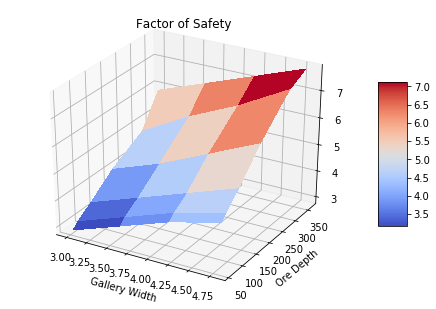

In [40]:
from matplotlib import cm
fig = plt.figure()
ax = a3(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Factor of Safety')
plt.xlabel('Gallery Width')
plt.ylabel('Ore Depth')
plt.show()

In [41]:
plt.clf()

In [60]:
from pandas.tools.plotting import table

ax = plt.subplot(212, frame_on=False) 
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax1 = plt.subplot(211, frame_on=False) 
ax1.xaxis.set_visible(False)  # hide the x axis
ax1.yaxis.set_visible(False)  # hide the y axis
table(ax,df_F)
table(ax1,df_wp)

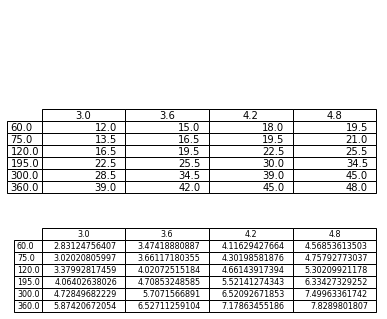

In [61]:
plt.show()